# Importing Liberies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')

# Data Preprocessing

In [3]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
     


In [5]:
data.shape

(400, 26)

In [6]:
# Label enconder

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class


In [7]:
data['red blood cells'] = encoder.fit_transform(data['red blood cells'])
data['pus cell'] = encoder.fit_transform(data['pus cell'])
data['pus cell clumps'] = encoder.fit_transform(data['pus cell clumps'])
data['bacteria'] = encoder.fit_transform(data['bacteria'])
data['hypertension'] = encoder.fit_transform(data['hypertension'])
data['diabetes mellitus'] = encoder.fit_transform(data['diabetes mellitus'])
data['coronary artery disease'] = encoder.fit_transform(data['coronary artery disease'])
data['coronary artery disease'] = encoder.fit_transform(data['coronary artery disease'])
data['appetite'] = encoder.fit_transform(data['appetite'])
data['pedal edema'] = encoder.fit_transform(data['pedal edema'])
data['anemia'] = encoder.fit_transform(data['anemia'])
data['class'] = encoder.fit_transform(data['class'])







In [8]:
 #Dropping all columns with incomplete record to avoid inaccuracy
data2 = data.dropna()
print(data2.shape)

(203, 26)


In [9]:
data2

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,3,1,1,1,1,0
5,5,60.0,90.0,1.015,3.0,0.0,2,2,0,0,...,39,7800,4.4,1,4,1,0,1,0,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,4,1,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,4,1,1,1,0,0
12,12,68.0,70.0,1.015,3.0,1.0,2,1,1,0,...,28,12200,3.4,1,4,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,3,1,0,0,0,2


# Dropping 'Class' column

In [10]:
data3 = data2.drop('class', axis=1, inplace=True)

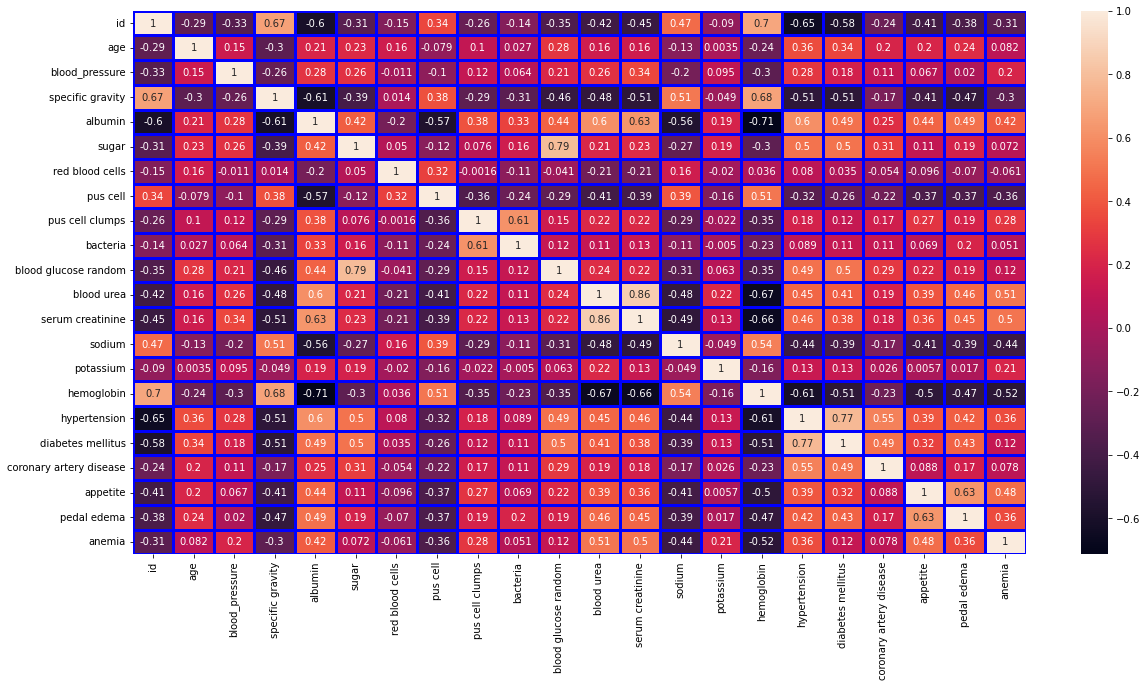

In [31]:
plt.figure(figsize = (20, 10))

sb.heatmap(data2.corr(), annot = True, linewidths = 3, linecolor = 'b')
plt.show()
     

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage ='complete')


model.fit(data2)

AgglomerativeClustering(linkage='complete', n_clusters=1)

In [13]:
from sklearn.metrics import silhouette_score as ss
Agg_score = []

for i in range(2,15):
    model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
    pre = model.fit_predict(data2)
    Agg_score = ss(data2, pre)
    print(i, 'score is : ', Agg_score)


2 score is :  0.7017592733261939
3 score is :  0.553102129535235
4 score is :  0.5178940295944984
5 score is :  0.5241198953350271
6 score is :  0.50111856421269
7 score is :  0.5297052711074499
8 score is :  0.5335288266229964
9 score is :  0.551223885567609
10 score is :  0.545558279188468
11 score is :  0.5271148864946767
12 score is :  0.5219675337335993
13 score is :  0.46845515897104256
14 score is :  0.44906043573212717


In [19]:
x = data2[['specific gravity', 'albumin', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'hemoglobin', 'hypertension', 'diabetes mellitus']]

model.fit(x)

AgglomerativeClustering(n_clusters=14)

In [20]:
clust_label = model.fit_predict(x)

clust_df = pd.DataFrame(clust_label)

clust_df.value_counts()

1     42
6     35
11    35
2     25
13    16
0     12
3      9
4      6
5      6
12     6
7      4
10     4
9      2
8      1
dtype: int64

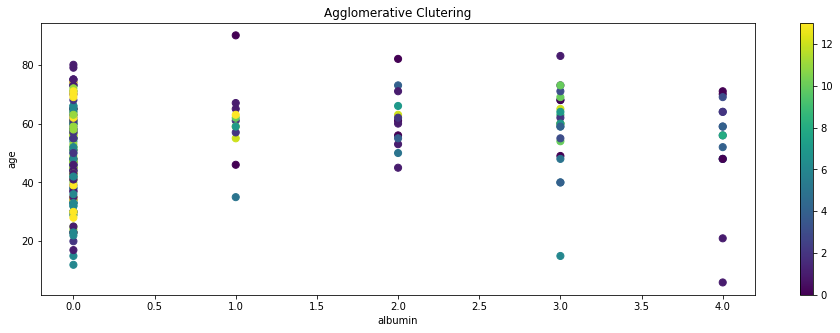

In [25]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(data2["albumin"] , data2['age'], s=50, c=clust_df[0])

## ONE WAY TO PLOT
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('albumin')
ax.set_ylabel("age")
plt.colorbar(scatter)

In [23]:
data2

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,32,6700,3.9,1,3,1,1,1,1
5,5,60.0,90.0,1.015,3.0,0.0,2,2,0,0,...,12.2,39,7800,4.4,1,4,1,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,9.5,29,12100,3.7,1,4,1,1,0,1
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,10.8,32,4500,3.8,1,4,1,1,1,0
12,12,68.0,70.0,1.015,3.0,1.0,2,1,1,0,...,9.7,28,12200,3.4,1,4,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,47,6700,4.9,0,3,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,54,7800,6.2,0,3,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,49,6600,5.4,0,3,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,51,7200,5.9,0,3,1,0,0,0


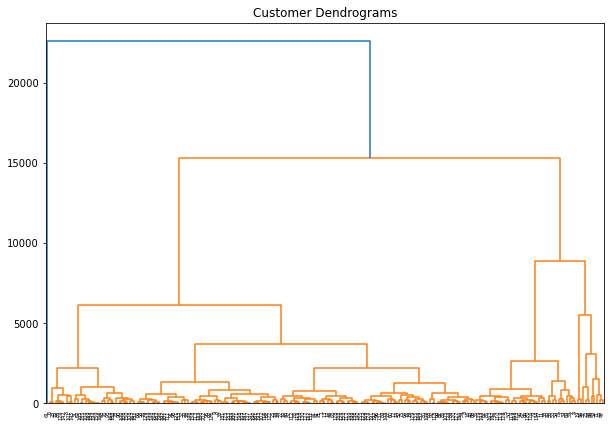

In [26]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data2, method="complete"))

In [28]:
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=5, random_state=0) #cluster by choosing 5 as the number of clusters

x_train = x.loc[:180]
x_test = x.loc[180:]

model2.fit(x_train)

KMeans(n_clusters=5, random_state=0)

In [29]:
sum_of_squared_dict = []

for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(x_train)
  sum_of_squared_dict.append(model.inertia_)

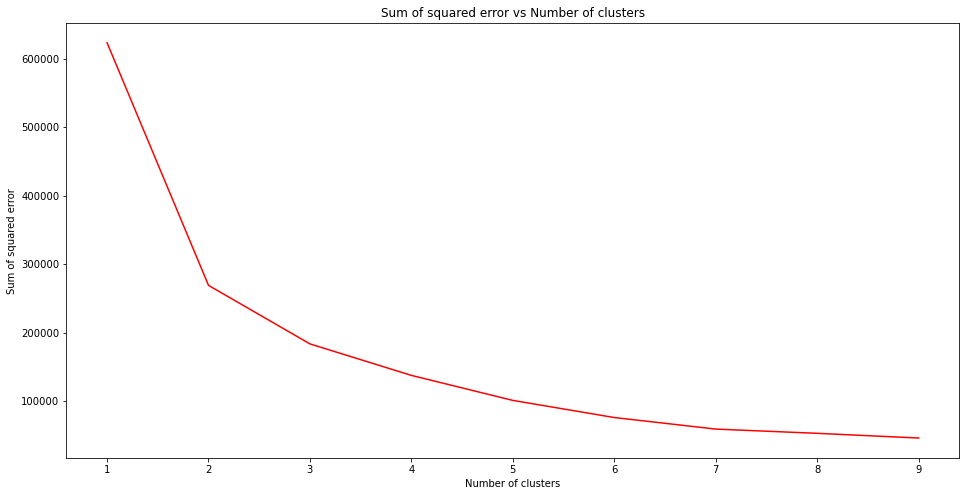

In [30]:
plt.figure(figsize=(16,8))

plt.plot(range(1,10), sum_of_squared_dict, color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.title('Sum of squared error vs Number of clusters')
plt.show()